In [1]:
from nearline_helpers import *
%jsroot on

Welcome to JupyROOT 6.26/10


In [2]:
t = r.TChain("tree")
# runs = [302]
runs = [270]
# runs = [304]
for run in runs:
    t.Add(f"../bin/*run00{run}_*.root")

In [3]:
c = r.TCanvas()
t.Draw("integrals.pedestalStdev","@integrals.size() == 1","colz")
c.SetLogy()
c.Draw()

In [15]:
def make_hist_from_trace(trace):
    nsamples = trace.size()
    h = hist.Hist(
        hist.axis.Regular(nsamples,0,nsamples)
    )
    vals = h.values()
    vals += trace
    return h


In [24]:
traces_per_channel = 100
n_traces = np.array([0 for i in range(5)])
with uproot.recreate("trace_dump.root") as fout:
    for i, e in enumerate(t):
        if np.all(n_traces > traces_per_channel):
            break 
        for wfi in e.integrals:
            if(wfi.amcNum != 1):
                continue
            ampl = int(round(wfi.amplitude,0))
            channel = wfi.channelTag
            # name = f'h_{i:05}_channel_{channel}_ampl_{ampl}'
            name = f'channel_{channel}/h_{i:05}_ampl_{ampl}'
            # print(name)
            fout[name] = make_hist_from_trace(wfi.raw.GetObject().trace)
            n_traces[channel] += 1

        # if( i > 4):
        #     break

In [25]:
n_traces

array([132, 113, 140, 154, 101])

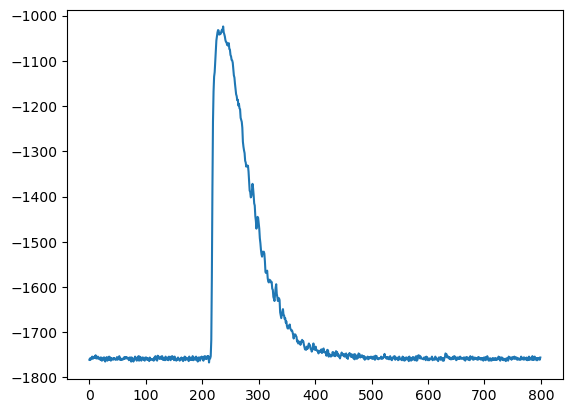

In [18]:
plt.plot(wfi.raw.GetObject().trace)

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f0c51750110>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

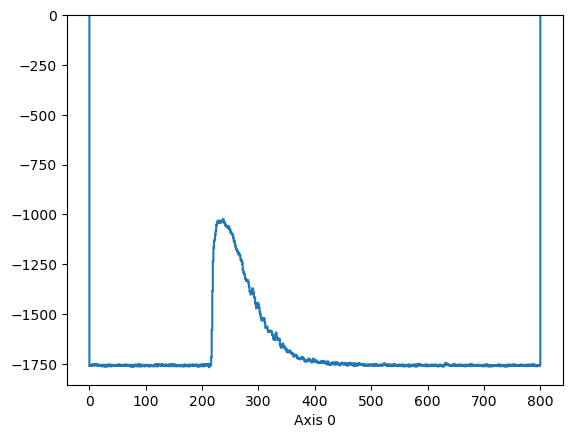

In [19]:
hi = make_hist_from_trace(wfi.raw.GetObject().trace)
hi.plot()